In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import os
from scipy.stats import spearmanr
from pprint import pprint

# all the correction approaches
all_methods = [
    'note_1_text',
    'note_2_text',
    'correction_response (ours, time reference: high-qual note)',
    'correction_response (ours, time reference: avg-qual note)',
    'correction_response (ours removing {retrieval+image}, i.e., vanilla gpt-4)',
    'correction_response (ours removing retrieval)',
    'correction_response (ours removing image)',
    'correction_response (ours, time reference: tweet)'
]

# all the annotations who completed the tasks
all_users = [  
    'group1_user1',
    'group1_user2',
    'group2_user1',
    'group2_user2',  
    'group3_user1',
    'group3_user2',
    'group4_user1',
    'group4_user2',
    'group5_user1',
    'group5_user2'
]

In [34]:
path = '../data/'
phase_1_post_ids = ['100', '107', '110', '114', '118', '119', '124', '128', '142', '144', '149', '152', '163', '173', '184']

# Overall quality
post_resp_label_1 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    df_eval = pd.read_csv(path + 'Q9-overall_quality.csv', dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [int(l)/10 for l in temp['label']]
    post_resp_label_1 = pd.concat((post_resp_label_1, temp))

thr_min, thr_max = 0, 1
results = {}

# Explicitness of correction

In [35]:
file = 'Q1-correction_explicitness.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Unclear', 'Implicit', 'Explicit'], [0,0.5,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2248, 'coe': 0.48599310561003295, 'p': 1.1065613663802877e-67}


# Accuracy of identification

In [36]:
file = 'Q2-identification_accuracy.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Do not exist', 'Exist with misidentification', 'Exist without misidentification'], [0,0.5,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2248, 'coe': 0.5197300857574857, 'p': 8.796604644600887e-79}


# Comprehensiveness of accuracy identification

In [37]:
file = 'Q2.1-identification_comprehensiveness.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['No', 'Low', 'Medium', 'High', 'Extremely High'], [0,0.25,0.5,0.75,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2248, 'coe': 0.6242867792471183, 'p': 1.8076886838625558e-122}


# Accuracy of explanation

In [38]:
file = 'Q2.2-explanation_accuracy.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Completely Incorrect', 'Mostly Incorrect', 'Half', 'Mostly Correct', 'Fully Correct'], [0,0.25,0.5,0.75,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2248, 'coe': 0.6178001875389924, 'p': 2.865411849578317e-119}


# Informativeness of explanation

In [39]:
file = 'Q2.2.1-explanation_informativeness.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [int(l)/10 if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 1982, 'coe': 0.8302715620801142, 'p': 2.5846513983023207e-253}


# Relevance of text

In [40]:
file = 'Q3-text_relevance.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [int(l)/10 if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2238, 'coe': 0.6690932240863231, 'p': 3.6548970818598417e-146}


# Factuality of text

In [41]:
file = 'Q4-text_factuality.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Completely False, Inaccurate, or Unverifiable', 'Mostly False, Inaccurate, or Unverifiable', 'Half Factual and Accurate', 'Mostly Factual and Accurate', 'Completely Factual and Accurate'], [0,0.25,0.5,0.75,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2230, 'coe': 0.6294091371911394, 'p': 4.610540005397706e-124}


# Fluency of text

In [42]:
file = 'Q5-text_fluency.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Yes', 'Yes, but minor', 'No'], [0,0.5,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2248, 'coe': 0.1909426199552996, 'p': 1.0900150148912291e-10}


# Coherence of text

In [43]:
file = 'Q6-text_coherence.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Barely Coherent and Logical', 'Partially Coherent and Logical', 'Coherent and Logical'], [0,0.5,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2172, 'coe': 0.3072362145423442, 'p': 3.582361254508835e-25}


# Toxicity of text

In [44]:
file = 'Q7-text_toxicity.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Yes', 'No'], [0,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    post_resp_label_2 = pd.concat((post_resp_label_2, temp))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2248, 'coe': 0.18467949661608205, 'p': 4.419797814316746e-10}


# Reachability of references

In [45]:
file = 'Q8-reference_reachability.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['No', 'Yes'], [0,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label', 'response_url_id']]
    temp['label'] = [label2num[l] if l!='nan' else 'nan' for l in temp['label']]
    temp_uni = temp[['post_id', 'response_id', 'username']].drop_duplicates()
    temp_uni['label'] = ['nan'] * temp_uni.shape[0]
    for idx, row in temp_uni.iterrows():
        temp_uni['label'][idx] = temp[(temp['post_id']==row['post_id']) & (temp['response_id']==row['response_id'])]['label'].mean()
    post_resp_label_2 = pd.concat((post_resp_label_2, temp_uni))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label['label_y'] = post_resp_label['label_y'].fillna('nan')
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 2008, 'coe': 0.12890789572129807, 'p': 4.1928929806905734e-05}


# # Credibility of references

In [46]:
file = 'Q8.1-reference_credibility.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['Low Not Informed','Medium','High','Very High'], [0,1/3,2/3,1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label', 'response_url_id']]
    temp['label'] = [label2num[l] if l in label2num.keys() else 'nan' for l in temp['label']]
    temp = temp[temp['label'] != 'nan']
    temp_uni = temp[['post_id', 'response_id', 'username']].drop_duplicates()
    temp_uni['label'] = ['nan'] * temp_uni.shape[0]
    for idx, row in temp_uni.iterrows():
        temp_uni['label'][idx] = temp[(temp['post_id']==row['post_id']) & (temp['response_id']==row['response_id'])]['label'].mean()
    post_resp_label_2 = pd.concat((post_resp_label_2, temp_uni))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label['label_y'] = post_resp_label['label_y'].fillna('nan')
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 1816, 'coe': 0.13673874280326562, 'p': 3.5633201655553735e-05}


In [47]:
file = 'Q8.2-reference_relevance.csv'
post_resp_label_2 = pd.DataFrame(columns=['post_id', 'response_id', 'username', 'label'])
for user in all_users:
    label2num = dict(zip(['No', 'Yes'], [0, 1]))
    df_eval = pd.read_csv(path + file, dtype=str)
    df_eval = df_eval[~df_eval['post_id'].isin(phase_1_post_ids)]
    df_eval['label'] = df_eval['label'].fillna('nan')
    temp = df_eval[df_eval['username'] == user][['post_id', 'response_id', 'username', 'label', 'response_url_id']]
    temp['label'] = [label2num[l] if l in label2num.keys() else 'nan' for l in temp['label']]
    temp = temp[temp['label'] != 'nan']
    temp_uni = temp[['post_id', 'response_id', 'username']].drop_duplicates()
    temp_uni['label'] = ['nan'] * temp_uni.shape[0]
    for idx, row in temp_uni.iterrows():
        temp_uni['label'][idx] = temp[(temp['post_id']==row['post_id']) & (temp['response_id']==row['response_id'])]['label'].mean()
    post_resp_label_2 = pd.concat((post_resp_label_2, temp_uni))

post_resp_label = post_resp_label_1.merge(post_resp_label_2, on=['post_id', 'response_id', 'username'], how='left')
post_resp_label = post_resp_label[(post_resp_label['label_x']<=thr_max) & (post_resp_label['label_x']>=thr_min)]
post_resp_label['label_y'] = post_resp_label['label_y'].fillna('nan')
post_resp_label = post_resp_label[post_resp_label['label_y'] != 'nan']
res = spearmanr(post_resp_label[['label_x', 'label_y']])
results[file] = {'N': post_resp_label.shape[0]*2, 'coe': res.correlation, 'p': res.pvalue}
pprint(results[file])

{'N': 1818, 'coe': 0.14456437391398477, 'p': 1.2111631235950632e-05}


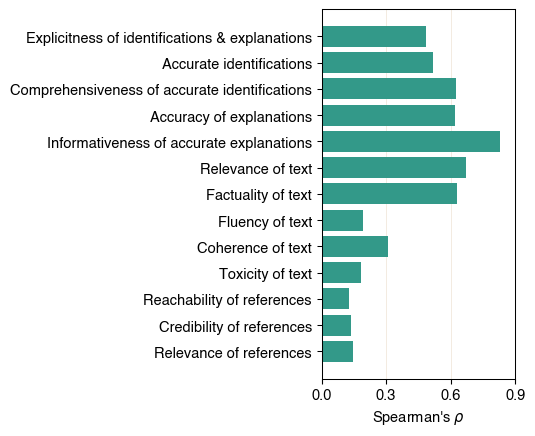

In [48]:
plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
matplotlib.rcParams['font.size'] = 10.5

files = results.keys()
labels = [
    'Explicitness of identifications & explanations',
    'Accurate identifications',
    'Comprehensiveness of accurate identifications',
    'Accuracy of explanations',
    'Informativeness of accurate explanations',
    'Relevance of text',
    'Factuality of text',
    'Fluency of text',
    'Coherence of text',
    'Toxicity of text',
    'Reachability of references',
    'Credibility of references',
    'Relevance of references'
]
ns = [results[f]['N'] for f in files]
coes = [results[f]['coe'] for f in files]
ps = [results[f]['p'] for f in files]

fig, ax = plt.subplots(figsize=(2.5, 4.8))
plt.barh(y=labels[::-1], width=coes[::-1], color='#339989')
plt.xlabel(r"Spearman's $\rho$")
plt.xlim([0,0.9])
plt.xticks([0,0.3,0.6,0.9])
plt.setp(ax.spines.values(), color='k', linewidth=0.75)
ax.yaxis.set_tick_params(width=0.75)
ax.set_axisbelow(True)
ax.grid(axis='x', color='#F3EBE1', linewidth=0.7)